In [1]:
import explogreg
import torch
from pyro.infer import MCMC, NUTS
import pyro.optim as optim

%load_ext autoreload
%autoreload 2

/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.manual_seed(0)
L = 3
T = 5 # 6  # Number of time points
# x = torch.linspace(0, 10, T).reshape((T,1))  # Time variable
x = torch.tensor([0, 56, 84, 112, 168, 280]).unsqueeze(1)  # Time variable

# y = torch.tensor([[0, 138, 188, 565, 572, 539], [0, 238, 548, 793, 649, 629], [0, 28, 128, 283, 405, 486]]).T  # Simulated binary outcomes (logistic regression)
y = torch.tensor([[0, 3.5, 6, 8, 1, 271], 
                  [0, 20, 11, 7, 272, 317], 
                  [0, 2, 2, 5, 2, 245]]).T  # Simulated binary outcomes (logistic regression)

In [3]:
print(x)
print(y)

tensor([[  0],
        [ 56],
        [ 84],
        [112],
        [168],
        [280]])
tensor([[  0.0000,   0.0000,   0.0000],
        [  3.5000,  20.0000,   2.0000],
        [  6.0000,  11.0000,   2.0000],
        [  8.0000,   7.0000,   5.0000],
        [  1.0000, 272.0000,   2.0000],
        [271.0000, 317.0000, 245.0000]])


In [4]:
obj = explogreg.Regression(x, y)
# mcmc_exp = obj.train_mcmc(regr="exp")
mcmc_log = obj.train_mcmc(regr="log") #, num_samples=100, warmup_steps=10)

# Get posterior samples
# posterior_samples_exp = mcmc_exp.get_samples()
posterior_samples_log = mcmc_log.get_samples()

Warmup [1]:   0%|          | 0/1500 [00:00, ?it/s]

Warmup [1]:   4%|▍         | 64/1500 [00:01, 77.83it/s, step size=9.38e-04, acc. prob=0.763]

Warmup [1]:   7%|▋         | 110/1500 [00:14,  1.87it/s, step size=1.99e-10, acc. prob=0.718]

Warmup [1]:  11%|█         | 165/1500 [01:28,  1.44s/it, step size=2.92e-05, acc. prob=0.718]

Warmup [1]:  27%|██▋       | 401/1500 [07:35,  1.70s/it, step size=6.26e-05, acc. prob=0.750]

Warmup [1]:  29%|██▉       | 440/1500 [08:35,  1.49s/it, step size=1.86e-05, acc. prob=0.751]

Warmup [1]:  33%|███▎      | 493/1500 [09:50,  1.48s/it, step size=3.85e-06, acc. prob=0.749]

Sample [1]:  35%|███▍      | 518/1500 [10:34,  1.79s/it, step size=7.28e-06, acc. prob=0.807]

Sample [1]:  40%|████      | 600/1500 [13:07,  1.94s/it, step size=7.28e-06, acc. prob=0.830]

Sample [1]:  46%|████▋     | 695/1500 [16:10,  1.82s/it, step size=7.28e-06, acc. prob=0.804]

Sample [1]:  52%|█████▏    | 786/1500 [18:48,  1.72s/it, step size=7.28e-06, acc. prob=0.812]


AttributeError: 'dict' object has no attribute 'get_samples'

In [6]:
posterior_samples_log = mcmc_log
for k, v in posterior_samples_log.items():
    print(k)
    print(v.shape)

carr_capac
(3000, 3)
fitness
(3000, 3)
init_time
(3000, 3)
sigma
(3000, 6, 3)


In [7]:
# mcmc_exp.summary()
obj.mcmc.summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
carr_capac[0]      8.00      0.00      8.00      8.00      8.00       nan       nan
carr_capac[1]    439.13     20.70    428.04    421.08    469.07       nan     99.71
carr_capac[2]      5.00      0.00      5.00      5.00      5.00       nan       nan
   fitness[0]   6799.86   1604.37   6243.97   5173.08   8982.52       nan       inf
   fitness[1]      0.03      0.01      0.03      0.02      0.05       nan      4.90
   fitness[2]  10034.03   2349.45   9267.99   7617.60  13216.52       nan       inf
 init_time[0]      1.00      0.00      1.00      1.00      1.00       nan     83.15
 init_time[1]     41.19     11.41     40.06     27.80     55.68       nan    464.46
 init_time[2]      1.00      0.00      1.00      1.00      1.00       nan     68.53
   sigma[0,0]      0.91      0.48      0.92      0.31      1.49       nan    355.60
   sigma[0,1]      0.40      0.24      0.46      0.08      0.67       nan  

/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/infer/mcmc/util.py:498: UserWarning: Traceback (most recent call last):
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/infer/mcmc/util.py", line 496, in wrapped
    val = fn(sample, *args, **kwargs)
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/ops/stats.py", line 189, in effective_sample_size
    gamma_k_c = autocovariance(input, dim=0)  # N x C x sample_shape
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/ops/stats.py", line 137, in autocovariance
    return autocorrelation(input, dim) * input.var(dim, unbiased=False, keepdim=True)
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/ops/stats.py", line 97, in autocorrelation
    raise NotImplementedError(
NotImplementedError: For CPU tensor, this me

# Exponential

In [6]:
# import seaborn as sns
# for k, v in posterior_samples_exp.items():
#     print(k)
#     sns.displot(v.numpy())

In [7]:
# import matplotlib.pyplot as plt

# # Generate new x values (e.g., test points for prediction)
# x_test = torch.linspace(0, 10, T)

# args = posterior_samples_exp["fitness"][:, None] * x_test.unsqueeze(1)
# y_preds = torch.exp(args)

# # Compute predictions for each posterior sample
# y_mean = y_preds.mean(dim=0)  # Mean prediction
# y_lower = torch.quantile(y_preds, 0.025, dim=0)  # 2.5% quantile (
# y_upper = torch.quantile(y_preds, 0.975, dim=0)  # 97.5% quantile (upper bound)

# # Plot results
# plt.figure(figsize=(8, 5))
# plt.scatter(x.squeeze(), y[:,0], color="black", label="Observed Data")  # Scatter plot of actual data
# plt.plot(x_test, y_mean[:,0], label="Mean Prediction", color="blue")
# plt.fill_between(x_test, y_lower[:,0], y_upper[:,0], color="blue", alpha=0.3, label="95% Credible Interval")
# plt.xlabel("Time")
# plt.ylabel("Probability")
# plt.legend()
# plt.title("Bayesian Logistic Regression with 95% Credible Intervals")
# plt.show()

# Logistic

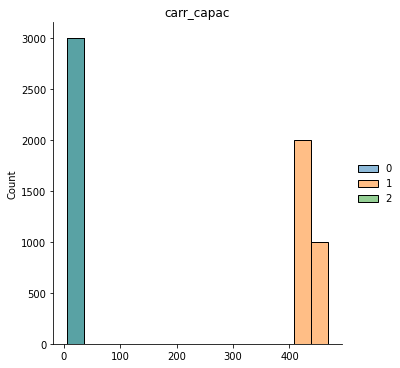

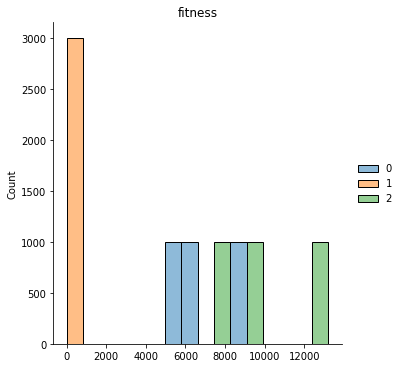

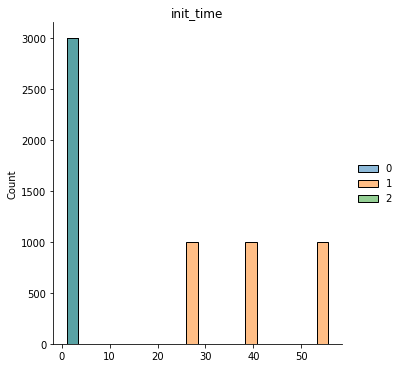

In [10]:
import seaborn as sns
for k, v in posterior_samples_log.items():
    try:
        ax = sns.displot(v)
        ax.set(title=k)
    except:
        pass

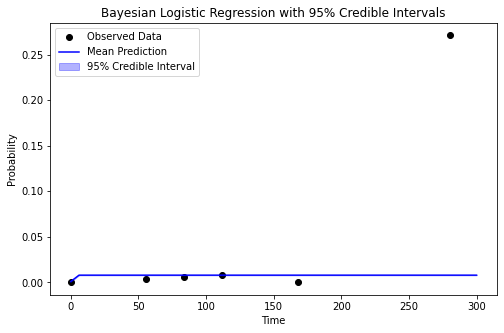

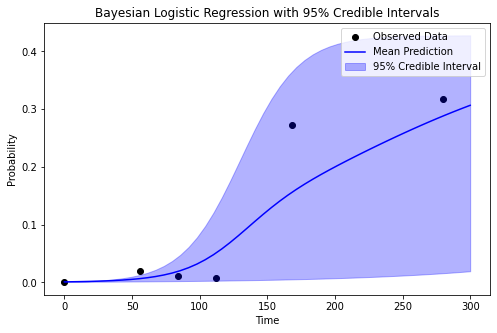

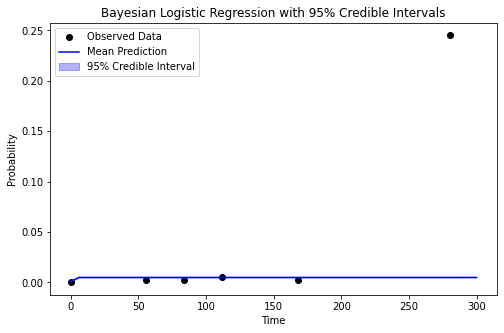

In [13]:
import matplotlib.pyplot as plt
import numpy as np

n_iters = posterior_samples_log["fitness"].shape[0]

# Generate new x values (e.g., test points for prediction)
x_test = torch.linspace(0, 300, 50)
post_fitness = posterior_samples_log["fitness"][:, None]
post_carr = posterior_samples_log["carr_capac"][:, None]

args = - post_fitness * x_test.unsqueeze(1).numpy()
y_preds = post_carr / ( 1 + (post_carr - 1) * np.exp(args) )
# Compute predictions for each posterior sample
y_mean = y_preds.mean(axis=0)  # Mean prediction
y_lower = np.quantile(y_preds, 0.05, axis=0)  # 2.5% quantile (
y_upper = np.quantile(y_preds, 0.95, axis=0)  # 97.5% quantile (upper bound)

# Plot results

for i in range(L):
    plt.figure(figsize=(8, 5))
    plt.scatter(x.squeeze(), y[:,i]/1000, color="black", label="Observed Data")  # Scatter plot of actual data
    plt.plot(x_test, y_mean[:,i]/1000, label="Mean Prediction", color="blue")
    plt.fill_between(x_test, y_lower[:,i]/1000, y_upper[:,i]/1000, color="blue", alpha=0.3, label="95% Credible Interval")
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.legend()
    plt.title("Bayesian Logistic Regression with 95% Credible Intervals")
    plt.show()